###### **Repository :** [https://github.com/alaoui-assia/HAH913E-Physical-activity-00-AlaouiAssia](https://github.com/alaoui-assia/HAH913E-Physical-activity-00-AlaouiAssia)  
###### **Équipe :** Assia Alaoui (travail individuel)


#### Quelques définitions
###### J'ai demandé à copilot de m'expliquer simplement les notions suivantes.

###### Accélération : est la variation de la vitesse d'un objet par rapport au temps. 

###### Accélérométrie : est la technique qui consiste à mesurer l’accélération d’un corps dans l’espace à l’aide d’un capteur (accéléromètre).

###### ENMO (Euclidean Norm Minus One) : est un indicateur d’activité physique calculé comme la norme √(x²+y²+z²) des accélérations, diminuée de 1 g (gravité), puis tronquée à 0 pour ne garder que le mouvement net.

###### Epoque : est une fenêtre de temps fixe (par ex. 10 s, 30 s, 60 s) dans laquelle on regroupe toutes les mesures pour les résumer en une seule valeur (souvent la moyenne).


###### On commence par la lecture des données.  On importe le fichier `0_z.csv` qui contient les colonnes de temps (t, en secondes) et les trois composantes d’accélération (x, y, z en g).

In [11]:
import pandas as pd

###### On lit le fichier en ignorant la première ligne de commentaire : accelerometer data in g.

In [12]:
df = pd.read_csv("0_z.csv", comment="#")

###### On affiche les 5 premières lignes et les noms de colonnes pour vérifier que le fichier est bien lu et que les colonnes ont la bonne structure.

In [13]:
print(df.head())
print(df.columns)

      t       x       y       z
0  0.00 -0.0938 -0.0156  0.9531
1  0.02 -0.0938 -0.0156  0.9531
2  0.04 -0.0938 -0.0156  0.9531
3  0.06 -0.0938 -0.0156  0.9531
4  0.08 -0.0938 -0.0156  0.9531
Index(['t', 'x', 'y', 'z'], dtype='object')


###### On passe au calcul de l'ENMO puis on vérifie les 5 premières lignes. J'ai demandé à copilot de me fournir le code pour calculer l'ENMO. 


In [14]:
import numpy as np
r = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
df["enmo"] = np.maximum(0, r - 1)
print(df.head())

      t       x       y       z  enmo
0  0.00 -0.0938 -0.0156  0.9531   0.0
1  0.02 -0.0938 -0.0156  0.9531   0.0
2  0.04 -0.0938 -0.0156  0.9531   0.0
3  0.06 -0.0938 -0.0156  0.9531   0.0
4  0.08 -0.0938 -0.0156  0.9531   0.0


###### On regroupe les données en fenêtres fixes (époques) de 10 s, 30 s et 60 s. J'ai demandé à copilot de me réexpliquer les époques avec un exemple. Puis de me fournir le code le plus simple pour le faire.

###### On a besoin d’un index temporel pour regrouper les données par fenêtres fixes (époques). 
###### On convertit `t` (en secondes) en un format temps (`datetime`).

In [15]:
df["time"] = pd.to_datetime(df["t"], unit="s")

###### On met cette colonne en **index** du tableau. 

In [16]:
df = df.set_index("time")

###### On calcule la moyenne d'ENMO toutes les 10, 30 et 60 secondes en utilisant la fonction resample() de pandas.

In [17]:
enmo_10s = df["enmo"].resample("10s").mean()
enmo_30s = df["enmo"].resample("30s").mean()
enmo_60s = df["enmo"].resample("60s").mean()

###### On vérifie les 5 premières lignes 

In [18]:
print(enmo_10s.head())
print(enmo_30s.head())
print(enmo_60s.head())

time
1970-01-01 00:00:00    0.00004
1970-01-01 00:00:10    0.00000
1970-01-01 00:00:20    0.00000
1970-01-01 00:00:30    0.00000
1970-01-01 00:00:40    0.00000
Freq: 10s, Name: enmo, dtype: float64
time
1970-01-01 00:00:00    0.000013
1970-01-01 00:00:30    0.000117
1970-01-01 00:01:00    0.000000
1970-01-01 00:01:30    0.000000
1970-01-01 00:02:00    0.000000
Freq: 30s, Name: enmo, dtype: float64
time
1970-01-01 00:00:00    0.000065
1970-01-01 00:01:00    0.000000
1970-01-01 00:02:00    0.000133
1970-01-01 00:03:00    0.000093
1970-01-01 00:04:00    0.358817
Freq: 60s, Name: enmo, dtype: float64


###### On veut visualiser : ENMO moyen vs ENMO intégré

###### On produit pour chaque époque (10 s, 30 s, 60 s), deux vues complémentaires :

###### - **ENMO moyen par époque**  
  ###### Calcul : moyenne de l’ENMO dans la fenêtre.  
  ###### **Pourquoi ?** Cela lisse le signal et donne l’**intensité moyenne** de l’activité sur un pas de temps standardisé. Utile pour comparer des périodes et voir la tendance générale.

###### - **ENMO intégré par époque**  
  ###### Calcul : somme de `ENMO × Δt` sur la fenêtre (→ g·min).  
  ###### **Pourquoi ?** Cela mesure la **quantité totale d’activité** accumulée pendant l’époque (aire sous la courbe). Utile pour quantifier l’“effort” cumulé, même si l’intensité instantanée varie.
###### On sauvegarde les fichiers sous les noms demandés :  
###### - `enmo_plot_10.0s.png`  
###### - `enmo_plot_30.0s.png`  
###### - `enmo_plot_60.0s.png`

###### Je savais comment traçer l'ENMO moyen sous forme de courbes mais pas l'ENMO intégré sous forme de barres. J'ai dû demander à copilot de m'aider avec le code. 

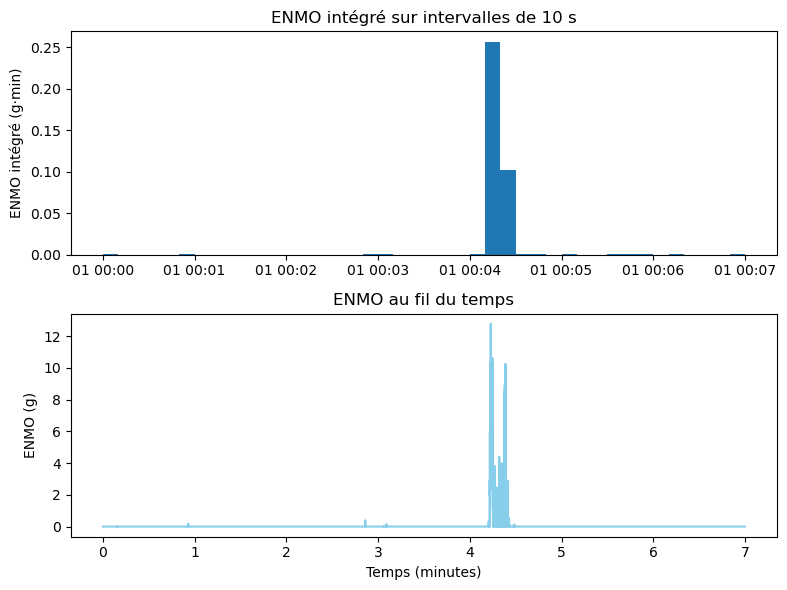

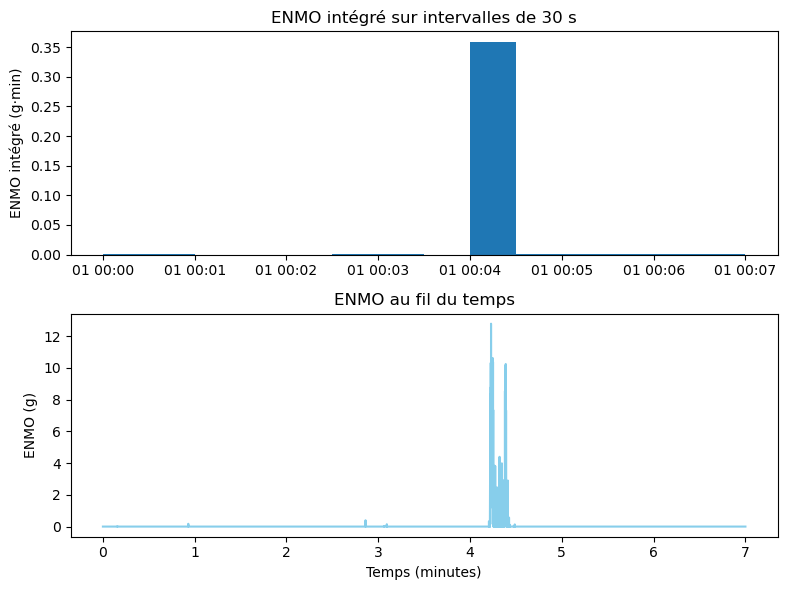

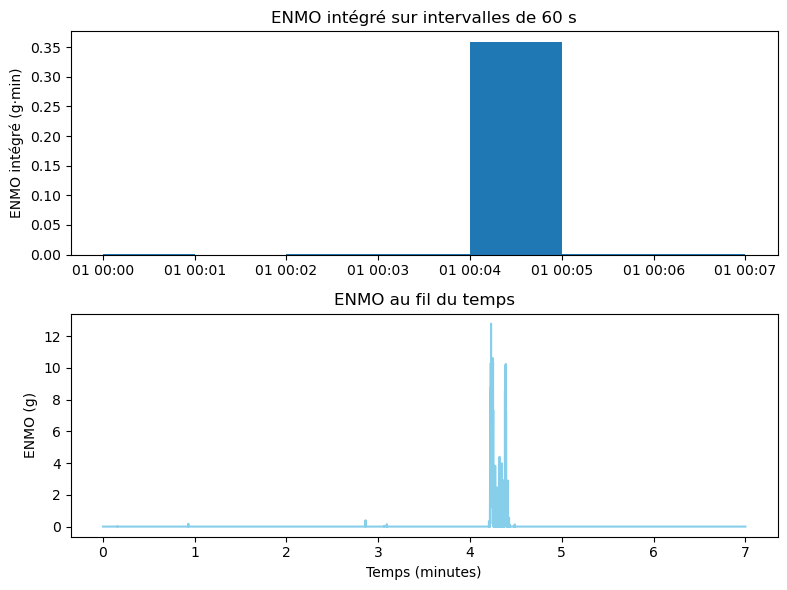

In [19]:
import matplotlib.pyplot as plt

# Boucle sur les 3 longueurs d'époques
for ep in [10, 30, 60]:
    # Calcul du pas de temps entre deux mesures (secondes)
    dt = df["t"].diff().fillna(0.0)

    # ENMO intégré = somme de ENMO*dt par fenêtre de ep secondes (converti en g·min)
    enmo_integrated = (df["enmo"] * dt).resample(f"{ep}s").sum() / 60.0

    # ENMO instantané (en minutes pour l'axe du temps)
    minutes = (df.index - df.index[0]).total_seconds() / 60.0

    # Création des deux graphiques
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,6))

    # Haut : ENMO intégré par fenêtre
    width_days = ep / 86400.0   # largeur de barre (en jours pour matplotlib)
    ax1.bar(enmo_integrated.index, enmo_integrated.values, width=width_days, align="edge")
    ax1.set_title(f"ENMO intégré sur intervalles de {ep} s")
    ax1.set_ylabel("ENMO intégré (g·min)")

    # Bas : ENMO instantané dans le temps
    ax2.plot(minutes, df["enmo"], color="skyblue")
    ax2.set_title("ENMO au fil du temps")
    ax2.set_xlabel("Temps (minutes)")
    ax2.set_ylabel("ENMO (g)")

    # Sauvegarde et affichage
    plt.tight_layout()
    plt.savefig(f"enmo_plot_{ep}.png", dpi=150)
    plt.show()


###### Interprétation 
###### - Le pic d’ENMO apparaît toujours vers 4 minutes car c’est le moment du mouvement.  
###### - Avec une époque courte (10 s), l’activité se répartit sur deux barres intégrées.  
###### - Avec des époques plus longues (30 s, 60 s), tout est regroupé en une seule barre plus haute.  
###### - ENMO moyen indique l’intensité du mouvement, tandis que l’ENMO intégré reflète la quantité totale d’activité (intensité × durée).  


###### J'ai posé à copilot quelques questions : 
###### Pourquoi les valeurs de l’ENMO moyen semblent similaires entre les différentes courbes (10 s, 30 s, 60 s) ? Ne devrait-il pas y avoir une différence puisque le nombre de données varie ?
###### L’ENMO moyen correspond à la moyenne dans chaque fenêtre. Même si la taille des fenêtres change, l’intensité moyenne du mouvement reste similaire car le mouvement est le même. La différence se voit surtout dans le lissage (pics plus ou moins atténués).
###### Pourquoi la valeur de l’ENMO intégré est environ 0.25 pour 10 s et 0.35 pour 30 s et 60 s ? Ne devrait-elle pas augmenter davantage, comme dans l’exemple du professeur ?
###### L’ENMO intégré additionne ENMO × durée. Avec une époque plus longue, tu intègres sur une période plus grande, donc la valeur augmente. Si ton augmentation est plus faible que celle de l’exemple, c’est probablement lié aux données de ton fichier (mouvement plus court, intensité plus faible) ou à la façon dont l’activité est répartie.
###### Pourquoi j’ai deux barres pour 10 s, mais une seule pour 30 s et 60 s ?
###### Parce que ton mouvement a duré un peu plus que 10 secondes : il est donc coupé en deux fenêtres successives de 10 s. Avec 30 s ou 60 s, tout est regroupé dans une seule fenêtre → donc une seule barre.
###### Quelles sont les conséquences de choisir des époques plus longues (30 s, 60 s) ?
###### Le signal est plus lissé et plus stable, ce qui facilite l’analyse des tendances générales, mais on perd de la précision et certains mouvements courts ou intenses peuvent être atténués ou masqués.